# Dependencies

In [1]:
#!/usr/bin/env python3
from utils import *
import baltic as bt
import treeswift
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
import pandas as pd
import subprocess
from utils import *
import tol_colors as tc
import glob
import pysam

# Data

In [2]:
alignment_path_cytB = 'raccoon_dog.cytB.fasta' # used for phylogenetics
alignment_path_complete = 'raccoon_dog.fasta' # used for snv heatmaps

gamey_tastes_bam_dir = './gamey_tastes/'
hsm_bam_dir = './hsm/'
he_metadata_path = './He2022_metadata.csv'

# Build trees

In [3]:
# pipeline to build tree, midpoint root it, and run treetime
def build_treetime_tree(alignment_path):
    # build tree
    build_tree_command = 'iqtree2 -m GTR+G4 -nt AUTO -redo -s ' + alignment_path
    # midpoint root tree
    rooting_command = './midpointRoot.R %s %s' % (alignment_path + '.treefile', alignment_path + '.midpointRooted.treefile')
    # run treetime
    treetime_command = 'treetime ancestral --aln %s --tree %s --outdir %s' % (alignment_path, alignment_path + '.midpointRooted.treefile', alignment_path + '.midpointRooted.treetime')

    subprocess.run(build_tree_command, shell=True)
    subprocess.run(rooting_command, shell=True)
    subprocess.run(treetime_command, shell=True)
    
build_treetime_tree(alignment_path=alignment_path_cytB)
build_treetime_tree(alignment_path=alignment_path_complete)

IQ-TREE multicore version 2.0.7 for Mac OS X 64-bit built Jun 17 2020
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    Jonathans-MBP.fritz.box (AVX2, FMA3, 16 GB RAM)
Command: iqtree2 -m GTR+G4 -nt AUTO -redo -s raccoon_dog.cytB.fasta
Seed:    128559 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Mon Sep 11 13:25:39 2023
Kernel:  AVX+FMA - auto-detect threads (16 CPU cores detected)

Reading alignment file raccoon_dog.cytB.fasta ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 44 sequences with 1140 columns, 57 distinct patterns
45 parsimony-informative, 28 singleton sites, 1067 constant sites
                                                                                                        Gap/Ambiguity  Composition  p-value
   1  JX099862.1_Nyctereutes_procyonoides_haplotype_Np09_2_cytochrome_b_cytb_gene_complete_cds_mitochondrial    0.00%    pass

Loading required package: ape
Loading required package: maps



0.00	-TreeAnc: set-up

0.04	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences of
    	tips at positions with AMBIGUOUS bases. This resulted in unexpected
    	behavior is some cases and is no longer done by default. If you want to
    	replace those ambiguous sites with their most likely state, rerun with
    	`reconstruct_tip_states=True` or `--reconstruct-tip-states`.

Inferred sequence evolution model (saved as raccoon_dog.cytB.fasta.midpointRooted.treetime//sequence_evolution_model.txt):
Substitution rate (mu): 1.0

Equilibrium frequencies (pi_i):
  A: 0.2916
  C: 0.2829
  G: 0.144
  T: 0.2714
  -: 0.0101

Symmetrized rates from j->i (W_ij):
	A	C	G	T	-
  A	0	0.7195	2.5836	0.5885	1.1139
  C	0.7195	0	0.8247	2.7883	1.1148
  G	2.5836	0.8247	0	0.6979	1.1354
  T	0.5885	2.7883	0.6979	0	1.1161
  -	1.1139	1.1148	1.1354	1.1161	0

Actual rates from j->i (Q_ij):
	A	C	G	T	-
  A	0	0.2098	0.7535	0.1716	0.3248
  C	0.2036	0	0.2333	0.7889	0.3154
  G	0.372	0.1188	0	0.1005	0.163

Loading required package: ape
Loading required package: maps



0.00	-TreeAnc: set-up

0.61	WARNING: Previous versions of TreeTime (<0.7.0) RECONSTRUCTED sequences of
    	tips at positions with AMBIGUOUS bases. This resulted in unexpected
    	behavior is some cases and is no longer done by default. If you want to
    	replace those ambiguous sites with their most likely state, rerun with
    	`reconstruct_tip_states=True` or `--reconstruct-tip-states`.

Inferred sequence evolution model (saved as raccoon_dog.fasta.midpointRooted.treetime//sequence_evolution_model.txt):
Substitution rate (mu): 1.0

Equilibrium frequencies (pi_i):
  A: 0.3181
  C: 0.2645
  G: 0.1407
  T: 0.2668
  -: 0.01

Symmetrized rates from j->i (W_ij):
	A	C	G	T	-
  A	0	0.408	3.8361	0.2795	20.4384
  C	0.408	0	0.4036	2.1656	22.7787
  G	3.8361	0.4036	0	0.3662	11.8292
  T	0.2795	2.1656	0.3662	0	9.6924
  -	20.4384	22.7787	11.8292	9.6924	0

Actual rates from j->i (Q_ij):
	A	C	G	T	-
  A	0	0.1298	1.2201	0.0889	6.5006
  C	0.1079	0	0.1067	0.5727	6.0239
  G	0.5396	0.0568	0	0.0515	1.6641

In [4]:
def get_name_loc(seq_id):
    species = 'Nyctereutes procyonoides'
    if not seq_id.startswith('JX'):
        name = seq_id.split('_')[0]
    if seq_id.startswith('ON0'):
        loc = 'Hubei'
        
    elif seq_id.startswith('GU'):
        loc = 'Inner Mongolia'
        species = 'Nyctereutes procyonoides'
    elif seq_id.startswith('OM7'):
        loc = 'South Korea'
        species = 'Nyctereutes procyonoides koreensis'
    elif seq_id.startswith('KF'):
        loc = 'South Korea'
        species = 'Nyctereutes procyonoides koreensis'
    elif seq_id.startswith('MG'):
        loc = 'Northeast China'
        species = 'Nyctereutes procyonoides'
    elif seq_id.startswith('JX'):
        for _ in seq_id.split('_'):
            if _.startswith('Np'):
                name = seq_id.split('_')[0] + '_' + _
                seq_num = int(_.strip('Np'))


        if seq_num <= 6:
            loc = 'South Korea'
        elif seq_num == 7:
            loc = 'North Korea'
        elif seq_num == 8:
            loc = 'North Korea / Russia'
        elif seq_num == 9:
            loc = 'Russia / Northeast China'
        elif seq_num == 10:
            loc = 'Northeast China'
        elif seq_num >= 11 and seq_num <= 13:
            loc = 'Russia'
        elif seq_num >= 14 and seq_num <= 15:
            loc = 'Vietnam'
        elif seq_num >= 16:
            loc = 'Japan'
        else:
            loc = 'Unknown'
    else: 
        loc = 'Unknown'
    
    return name, loc


def get_name_loc_duplicated(seq_id):
    species = 'N.p.'
    if not seq_id.startswith('JX'):
        name = seq_id.split('_')[0]
    if seq_id.startswith('ON0'):
        loc = 'Hubei'
        
    elif seq_id.startswith('GU'):
        loc = 'Inner Mongolia'
        species = 'N.p.'
    elif seq_id.startswith('OM7'):
        loc = 'South Korea'
        species = 'N.p. koreensis'
    elif seq_id.startswith('KF'):
        loc = 'South Korea'
        species = 'N.p. koreensis'
    elif seq_id.startswith('MG'):
        loc = 'Northeast China'
        species = 'N.p. ussurienusis'
    elif seq_id.startswith('JX'):
        for _ in seq_id.split('_'):
            if _.startswith('Np'):
                name = seq_id.split('_')[0] + '_' + _
                seq_num = int(_.strip('Np'))
        if seq_num <= 6:
            loc = 'South Korea'
            species = 'N.p. koreensis'
        elif seq_num == 7:
            loc = 'North Korea'
            species = 'N.p. koreensis'
        elif seq_num == 8:
            if 'Np08_1' in seq_id:
                loc = 'North Korea'
                species = 'N.p. koreensis'
            elif 'Np08_2' in seq_id:
                loc = 'Russia'
                species = 'N.p. ussuriensis'
        elif seq_num == 9:
            if 'Np09_1' in seq_id:
                loc = 'Russia'
                species = 'N.p. ussuriensis'
            elif 'Np09_2' in seq_id:
                loc = 'Northeast China'
                species = 'N.p. procyonoides'
            # loc = 'Russia / Northeast China'
        elif seq_num == 10:
            loc = 'Northeast China'
            species = 'N.p. procyonoides'
        elif seq_num >= 11 and seq_num <= 13:
            loc = 'Russia'
            species = 'N.p. ussuriensis'
        elif seq_num >= 14 and seq_num <= 15:
            loc = 'Vietnam'
            species = 'N.p. procyonoides'
        elif seq_num >= 16:
            loc = 'Japan'
            if seq_num in [18, 28, 29, 30]:
                species = 'N.p. albus'
            else:
                species = 'N.p. viverrinus'
        else:
            loc = 'Unknown'
    else: 
        loc = 'Unknown'
    
    return name, species, loc



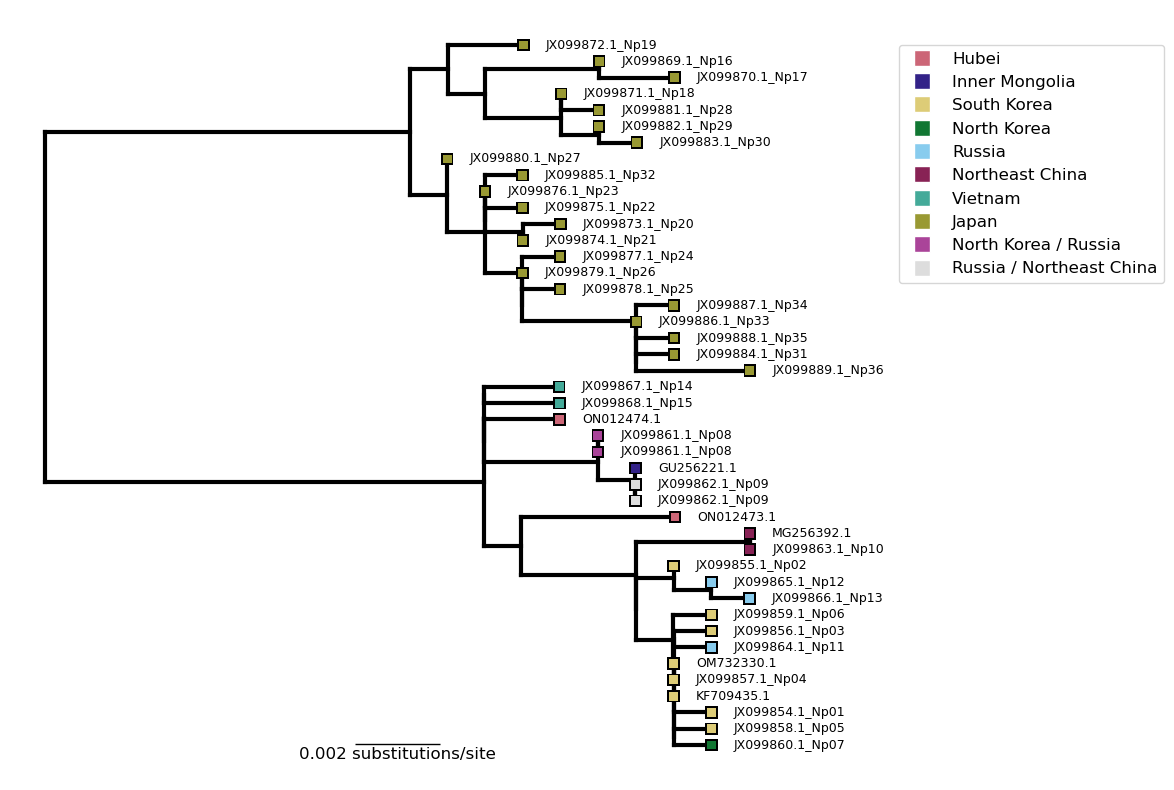

In [5]:
nexusPath = alignment_path_cytB + '.midpointRooted.treetime/annotated_tree.nexus'
myTree = bt.loadNexus(nexusPath, sortBranches=False, absoluteTime=False)
myTree.sortBranches(sortByHeight=False, sort_function = lambda k: len(k.leaves))

# color func
locs = ['Hubei', 'Inner Mongolia', 'South Korea', 'North Korea', 'Russia', 'Northeast China', 'Vietnam', 'Japan', 'North Korea / Russia', 'Russia / Northeast China']
palette = 'muted'
colors = tc.tol_cset(palette)
c_func = lambda k: colors[locs.index(get_name_loc(k.name)[-1])]

# text func
text_func = lambda k: get_name_loc(k.name)[0]

# plot tree
f,ax = plt.subplots(figsize=(10,10),facecolor='w')
myTree.plotTree(ax, width=3)

markersize = 40
myTree.plotPoints(ax, target=lambda k: k.is_leaf(), colour=c_func, marker='s', size=markersize)

# write sample
for k in myTree.Objects:
    if k.is_leaf():
        ax.text(k.x+max([i.x for i in myTree.Objects])*0.03, k.y, get_name_loc(k.name)[0], ha='left', va='center', fontsize=9)

# legend
for i,loc in enumerate(locs):
    ax.scatter([],[],c=colors[i],s=markersize, label=loc)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False, fontsize=12)

# legend
markersize = 12
custom_legend = []
for index, loc in enumerate(locs):
    custom_legend.append(Line2D([0], [0], marker='s', color='w', label=loc, markerfacecolor=colors[index], markersize=markersize))
ax.legend(handles = custom_legend, loc='right', fontsize='large', bbox_to_anchor=(1.5,0.8))

fontprops = fm.FontProperties(size=12)
scalebar = AnchoredSizeBar(ax.transData,
                        0.002, '0.002 substitutions/site', 'lower center', 
                        pad=1,
                        color='black',
                        frameon=False,
                        size_vertical=0.02,
                        fontproperties=fontprops)
ax.add_artist(scalebar)

# fig adjustments
[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.axis("off")

plt.show()

# Subsample treeswift

In [6]:
tree = treeswift.read_tree_nexus(alignment_path_cytB + '.midpointRooted.treetime/annotated_tree.nexus')['tree1']
rd_cytB_coords = [14194, 15333]

for n in tree.traverse_preorder():
    if n.label == 'NODE_0000021':
        subtree_root = n
    if 'node_params' in dir(n):
        mutations = n.node_params.split('=')[-1].replace('"', '').split(',')
        adjusted_mutations = []
        sites = []
        for mut in mutations:
            adjusted_mut = mut[0] + str(int(mut[1:-1]) + rd_cytB_coords[0] - 1) + mut[-1]
            adjusted_sites = int(mut[1:-1]) + rd_cytB_coords[0] - 1
            adjusted_mutations.append(adjusted_mut)
        n.node_params = '&mutations="' + ','.join(adjusted_mutations) + '"'
    
subtree = tree.extract_subtree(subtree_root)
subtree.write_tree_nexus(alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.mutsAdjusted.nexus')
tree.write_tree_nexus(alignment_path_cytB + '.midpointRooted.treetime/annotated_tree.mutsAdjusted.nexus')

for n in subtree.traverse_preorder():
    if 'node_params' in dir(n):
        mutations = n.node_params.split('=')[-1].replace('"', '').split(',')
        sites = []
        for mut in mutations:
            site = int(mut[1:-1]) 
            sites.append(site)
        # print(n.label, sites)

for n in subtree.traverse_preorder():
    if 'node_params' in dir(n):
        delattr(n, 'node_params')
subtree.write_tree_newick(alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.newick')


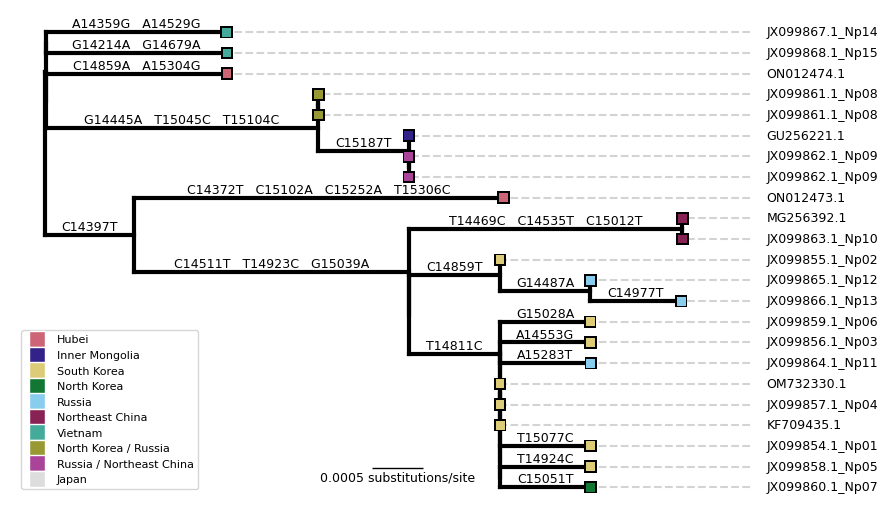

In [7]:
subtree_path = alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.newick'
myTree = bt.loadNewick(subtree_path, sortBranches=False, absoluteTime=False)
myTree.sortBranches(sortByHeight=False, sort_function = lambda k: len(k.leaves))

subtree_annotated_path = alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.mutsAdjusted.nexus'
subtree_annotated = treeswift.read_tree_nexus(subtree_annotated_path)['tree1']
subtree_nodes_muts = {}
for n in subtree_annotated.traverse_inorder():
    if n.is_root():
        continue
    if 'node_params' in dir(n):
        subtree_nodes_muts[n.label] = n.node_params.split('=')[-1].replace('"', '').split(',')

max_kx = 0
for k in myTree.Objects:
    if k.is_leaf():
        if k.name in subtree_nodes_muts:
            k.traits['mut_string'] = subtree_nodes_muts[k.name]
    else:
        k.name = k.traits['label']
        if k.name in subtree_nodes_muts:
            k.traits['mut_string'] = subtree_nodes_muts[k.name]

    if k.x > max_kx: 
        max_kx = k.x

# color func
locs = ['Hubei', 'Inner Mongolia', 'South Korea', 'North Korea', 'Russia', 'Northeast China', 'Vietnam', 'North Korea / Russia', 'Russia / Northeast China', 'Japan']
palette = 'muted'
colors = tc.tol_cset(palette)
c_func = lambda k: colors[locs.index(get_name_loc(k.name)[-1])]

# text func
text_func = lambda k: get_name_loc(k.name)[0]

# plot tree
f,ax = plt.subplots(figsize=(10,6.5),facecolor='w')
myTree.plotTree(ax, width=3)

markersize = 40
myTree.plotPoints(ax, target=lambda k: k.is_leaf(), colour=c_func, marker='s', size=markersize, zorder=100)

# write sample
for k in myTree.Objects:
    if k.is_leaf():
        ax.text(max_kx*1.05, k.y, get_name_loc(k.name)[0], ha='left', va='center', fontsize=9)
        ax.hlines(y=k.y, xmin=max_kx*1.04, xmax=k.x, linestyles='--', colors='lightgrey', zorder=0)
    
    if 'mut_string' in k.traits:
        ax.text((k.x + k.parent.x)/2, k.y + 0.07, '   '.join(k.traits['mut_string']), ha='center', va='bottom', fontsize=9)

# legend
for i,loc in enumerate(locs):
    ax.scatter([],[],c=colors[i],s=markersize, label=loc)

# legend
markersize = 12
custom_legend = []
for index, loc in enumerate(locs):
    custom_legend.append(Line2D([0], [0], marker='s', color='w', label=loc, markerfacecolor=colors[index], markersize=markersize))
ax.legend(handles = custom_legend, loc='right', fontsize=8, bbox_to_anchor=(.25,0.2))

fontprops = fm.FontProperties(size=9)
scalebar = AnchoredSizeBar(ax.transData,
                        0.0005, '0.0005 substitutions/site', 'lower center', 
                        pad=2,
                        color='black',
                        frameon=False,
                        size_vertical=0.02,
                        fontproperties=fontprops)
ax.add_artist(scalebar)

# fig adjustments
[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.axis("off")

plt.show()

# Prune the tree. 
Get rid of everything in the bottom clade with the exception ot KF709435.1 and JX099854.1_Np03

In [8]:
exclude = [
'JX099854.1_Nyctereutes_procyonoides_haplotype_Np01_cytochrome_b_cytb_gene_complete_cds_mitochondrial',
'JX099859.1_Nyctereutes_procyonoides_haplotype_Np06_cytochrome_b_cytb_gene_complete_cds_mitochondrial',
'JX099857.1_Nyctereutes_procyonoides_haplotype_Np04_cytochrome_b_cytb_gene_complete_cds_mitochondrial',
'JX099860.1_Nyctereutes_procyonoides_haplotype_Np07_cytochrome_b_cytb_gene_complete_cds_mitochondrial',
'JX099858.1_Nyctereutes_procyonoides_haplotype_Np05_cytochrome_b_cytb_gene_complete_cds_mitochondrial',
'JX099864.1_Nyctereutes_procyonoides_haplotype_Np11_cytochrome_b_cytb_gene_complete_cds_mitochondrial',
'OM732330.1'
]

subtree_path = alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.newick'
subtree_annotated_path = alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.mutsAdjusted.nexus'

subtree = treeswift.read_tree_newick(subtree_path)
subtree_annotated = treeswift.read_tree_nexus(subtree_annotated_path)['tree1']

subtree_pruned = subtree.extract_tree_with([n.label for n in subtree.traverse_leaves() if n.label not in exclude])
subtree_annotated_pruned = subtree_annotated.extract_tree_with([n.label for n in subtree_annotated.traverse_leaves() if n.label not in exclude])

subtree_pruned.write_tree_newick(alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree_pruned.newick')
subtree_annotated_pruned.write_tree_nexus(alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree_pruned.mutsAdjusted.nexus')

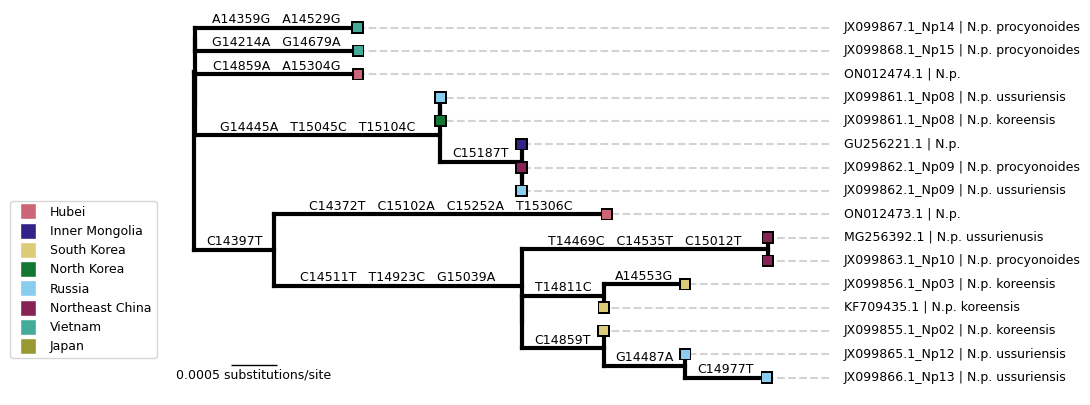

In [9]:
subtree_path = alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree_pruned.newick'
myTree = bt.loadNewick(subtree_path, sortBranches=False, absoluteTime=False)
myTree.sortBranches(sortByHeight=False, sort_function = lambda k: len(k.leaves))

subtree_annotated_path = alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree_pruned.mutsAdjusted.nexus'
subtree_annotated = treeswift.read_tree_nexus(subtree_annotated_path)['tree1']
subtree_nodes_muts = {}
for n in subtree_annotated.traverse_inorder():
    if n.is_root():
        continue
    if 'node_params' in dir(n):
        subtree_nodes_muts[n.label] = n.node_params.split('=')[-1].replace('"', '').split(',')

max_kx = 0
for k in myTree.Objects:
    if k.is_leaf():
        if k.name in subtree_nodes_muts:
            k.traits['mut_string'] = subtree_nodes_muts[k.name]
        if 'Np03' in k.name:
            k.parent.traits['mut_string'] = ['T14811C'] # this node sometimes get missed by treeswift, so we manually add it
    else:
        k.name = k.traits['label']
        if k.name in subtree_nodes_muts:
            k.traits['mut_string'] = subtree_nodes_muts[k.name]

        # if '36' in k.name:
        #     k.traits['mut_string'] = ['T14811C']

    if k.x > max_kx: 
        max_kx = k.x

# color func
locs = ['Hubei', 'Inner Mongolia', 'South Korea', 'North Korea', 'Russia', 'Northeast China', 'Vietnam', 'Japan']
palette = 'muted'
colors = tc.tol_cset(palette)
c_func = lambda k: colors[locs.index(get_name_loc_duplicated(k.name)[-1])]

# text func
text_func = lambda k: get_name_loc(k.name)[0]

# plot tree
f,ax = plt.subplots(figsize=(9,5),facecolor='w')
myTree.plotTree(ax, width=3)

markersize = 40
myTree.plotPoints(ax, target=lambda k: k.is_leaf(), colour=c_func, marker='s', size=markersize, zorder=100)

# write sample
for k in myTree.Objects:
    if k.is_leaf():
        # ax.text(k.x+max([i.x for i in myTree.Objects])*0.03, k.y, get_name_loc(k.name)[0], ha='left', va='center', fontsize=9)
        ax.text(max_kx*1.05, k.y, ' | '.join(get_name_loc_duplicated(k.name)[0:-1]), ha='left', va='center', fontsize=9)
        ax.hlines(y=k.y, xmin=max_kx*1.04, xmax=k.x, linestyles='--', colors='lightgrey', zorder=0)
    
    if 'mut_string' in k.traits:
        # print(k.traits['mut_string'])
        # print(k.parent)
        # if get_name_loc(k.name)[0] == 'ON012473.1':
        #     ax.text((k.parent.x)*.96, k.y + 0.07, '  '.join(k.traits['mut_string']), ha='left', va='bottom', fontsize=9)
        # else:
        ax.text((k.x + k.parent.x)/2, k.y + 0.07, '   '.join(k.traits['mut_string']), ha='center', va='bottom', fontsize=9)

# legend
for i,loc in enumerate(locs):
    ax.scatter([],[],c=colors[i],s=markersize, label=loc)

# legend
markersize = 12
custom_legend = []
for index, loc in enumerate(locs):
    custom_legend.append(Line2D([0], [0], marker='s', color='w', label=loc, markerfacecolor=colors[index], markersize=markersize))
ax.legend(handles = custom_legend, loc='right', fontsize=9, bbox_to_anchor=(0,0.3))

fontprops = fm.FontProperties(size=9)
scalebar = AnchoredSizeBar(ax.transData,
                        0.0005, '0.0005 substitutions/site', 'lower left', 
                        pad=1,
                        color='black',
                        frameon=False,
                        size_vertical=0.02,
                        fontproperties=fontprops)
ax.add_artist(scalebar)

# fig adjustments
[ax.spines[loc].set_visible(False) for loc in ax.spines]
ax.axis("off")

plt.savefig(alignment_path_cytB + '.midpointRooted.treetime/annotated_subtree.pruned.svg', bbox_inches='tight', pad_inches=0)
plt.show()

# then add triangle in illustration software to symbolize Japan clade

# Private mutations and heatmaps

In [10]:
def get_snvs_from_bam(bam_path):
    bam_name = bam_path.split('/')[-1]
    if bam_name.startswith('Nyc'):
        contig_name = 'NC_013700.1'
        # continue
    elif bam_name.startswith('Erinaceus_amurensis'): # Amur hedgehog
        contig_name = 'KX964606.1' 
    elif bam_name.startswith('Hystrix_brachyura'): # Malayan/Himalayan porcupine
        contig_name = 'NC_050263.1'
    elif bam_name.startswith('Paguma_larvata'): # masked palm civet
        contig_name = 'NC_029403.1'
    elif bam_name.startswith('Rhizomys_pruinosus'): # Sumatran bamboo rat
        contig_name = 'NC_021478.1'

    results = []
    samfile = pysam.AlignmentFile(bam_path, 'rb') 
    for pileupcolumn in samfile.pileup(contig_name): ## Contig name
        # get site 
        site = pileupcolumn.pos + 1
        bases = {"A":0,"C":0,"G":0,"T":0}
        for pileupread in pileupcolumn.pileups:
            if not pileupread.is_del and not pileupread.is_refskip:
                base = pileupread.alignment.query_sequence[pileupread.query_position]
                if base in bases:
                    bases[base] += 1
        basesum = sum(bases.values())

        # best base
        if basesum > 0:
            best_base = max(bases, key=bases.get)
            best_base_freq = bases[best_base]/basesum
        else:
            best_base = 'N'
            best_base_freq = 0
        
        # second best base
        if basesum > 1:
            second_best_base = max([k for k in bases if k != best_base], key=bases.get)
            second_best_base_freq = bases[second_best_base]/basesum
            if bases[second_best_base] == 0:
                second_best_base = 'N'
                second_best_base_freq = 0
        else:
            second_best_base = 'N'
            second_best_base_freq = 0 
        results.append([site, bam_name, bases['A'], bases['C'], bases['G'], bases['T'], best_base, second_best_base, best_base_freq, second_best_base_freq, basesum])
    
    # fill in the rest of the sites with 0s
    included_sites = [x[0] for x in results]
    for index, nt in enumerate(refseq):
        if index+1 not in included_sites:
            results.append([index+1, bam_name, 0, 0, 0, 0, 'N', 'N', 0, 0, 0])
    samfile.close()
    return pd.DataFrame(results, columns=['Position', 'Sample', 'A', 'C', 'G', 'T', 'Major', 'Alt', 'Major_freq', 'Alt_freq', 'Depth'])


def get_snvs_from_all_bams(bam_dir, prefix):
    bam_paths = glob.glob(bam_dir + prefix + '*.bam')
    df = pd.concat([get_snvs_from_bam(bam_path) for bam_path in bam_paths])
    return df


def compare_to_ref(refseq, snv_df):
    # compare to refseq, which is the inferred root sequence
    snv_df['Ref'] = snv_df.apply(lambda x: refseq[x['Position']-1], axis=1)
    snv_df['nonRef_percent'] = snv_df.apply(lambda x: (1-x[refseq[x['Position']-1]]/x['Depth']) if x['Depth'] > 0 else -1, axis=1)
    return snv_df


def get_backbone_mut_perc(df_all, refseq, backbone_aln_path):
    # for all sites where there is a mutation along the backbone tree, calculate the percentage of reads that have a mutation at that site
    df_all['backbone_mut'] = None
    df_all['backbone_mut_perc'] = None
    # get all mutations from the backbone relative to the root_seq
    backbone_aln = readFASTA(backbone_aln_path)
    backbone_mutations = set()
    backbone_sites = set()
    for key in backbone_aln:
        seq = backbone_aln[key]
        backbone_mutations = backbone_mutations.union(set(compare_seqs(refseq, seq)))
        backbone_sites = backbone_sites.union(set([int(mutation[1:-1]) for mutation in backbone_mutations]))

    for mut in backbone_mutations:
        # calculate backbone_mut_perc for the site corresponding to this mutation
        site = int(mut[1:-1])
        df_all.loc[df_all['Position'] == site, 'backbone_mut_perc'] = df_all.loc[df_all['Position'] == site].apply(lambda x: -1 if ((x[mut[-1]] + x[mut[0]]) == 0) else x[mut[-1]] / (x[mut[-1]] + x[mut[0]]), axis=1)
        df_all.loc[df_all['Position'] == site, 'backbone_mut'] = mut[-1]
    return df_all


def get_private_snvs(df_all, refseq, backbone_aln_path):
    # get all mutations from the backbone relative to the root_seq
    backbone_aln = readFASTA(backbone_aln_path)
    backbone_mutations = set()
    backbone_sites = set()
    for key in backbone_aln:
        seq = backbone_aln[key]
        backbone_mutations = backbone_mutations.union(set(compare_seqs(refseq, seq)))
        backbone_sites = backbone_sites.union(set([int(mutation[1:-1]) for mutation in backbone_mutations]))

    df_all['private'] = 'N'
    for site in df_all['Position'].unique():
        if site in backbone_sites:
            continue
         
        if len(df_all[(df_all['nonRef_percent'] >= 0.20) & (df_all['Position'] == site)]) >= 3: #  & (df_all['Depth'] >= 3)
            df_all.loc[df_all['Position'] == site, 'private'] = 'Y'
    return df_all


refseq = readFASTA(alignment_path_complete + '.midpointRooted.treetime/ancestral_sequences.fasta')['NODE_0000021']
df_all_market = get_snvs_from_all_bams(gamey_tastes_bam_dir, 'Nyc')
df_all_gamey = get_snvs_from_all_bams(hsm_bam_dir, 'Nyc')
df_all = pd.concat([df_all_market, df_all_gamey])
df_all['Sample'] = df_all['Sample'].apply(lambda x: '_'.join(x.split('_')[2:]).split('.bam')[0])
df_all = compare_to_ref(refseq, df_all)
df_all = get_backbone_mut_perc(df_all, refseq, alignment_path_complete)
df_all = get_private_snvs(df_all, refseq, alignment_path_complete)
df_all.to_csv('./Nyctereutes_procyonoides_snvs.csv', index=False)

### Private mutations

In [11]:
def count_private_muts(df_all):
    results = []
    # samples = df_all['Sample'].unique()
    for site in df_all[df_all['private']=='Y']['Position'].unique():
        samples_with_mut = list(df_all[(df_all['nonRef_percent'] >= 0.20) & (df_all['Position'] == site)]['Sample'])

        # number of samples that have 'West' in the name
        num_market = len([sample for sample in samples_with_mut if 'West' in sample])
        num_gamey = len(samples_with_mut) - num_market
        num_total = len(samples_with_mut)
        num_shared = min(num_market, num_gamey)
        results.append([site, num_market, num_gamey, num_total, num_shared])
    return pd.DataFrame(results, columns=['Position', 'market', 'gamey_tastes', 'total', 'num_shared'])

df_private_counts = count_private_muts(df_all)
rd_cytB_coords = [14194, 15333]
df_private_counts[(rd_cytB_coords[0] <= df_private_counts['Position']) & (df_private_counts['Position'] <= 15333)]

,Position,market,gamey_tastes,total,num_shared
184,15319,1,3,4,1


### Relabel for figure

In [12]:
df_all['Sample'].unique()

def get_srr(label):
    return label.split('_')[0]

def HSM_stall(label):
    return label.split('_')[2]

def GT_library(label):
    return label.split('_')[1]

def new_label(label, he_metadata_df):
    srr = get_srr(label)
    if 'West' in label:
        stall = HSM_stall(label)
        return f'{stall}|{srr}'
    else:
        library = GT_library(label)
        province = he_metadata_df[he_metadata_df['Library'] == library]['Province'].values[0]
        city = he_metadata_df[he_metadata_df['Library'] == library]['City'].values[0]
        return f'{province}|{city}|{srr}'

he_metadata = pd.read_csv(he_metadata_path)
he_metadata_rd_mask = he_metadata['species'] == 'Nyctereutes procyonoides'
he_metadata[he_metadata_rd_mask].drop_duplicates('Library').sort_values(by=['Province', 'City'])
df_all['Label'] = df_all['Sample'].apply(lambda x: new_label(x, he_metadata))


In [13]:
df_all.to_csv('./Nyctereutes_procyonoides_snvs.updated.csv', index=False)

# Plot

Fill n/a values with -1 

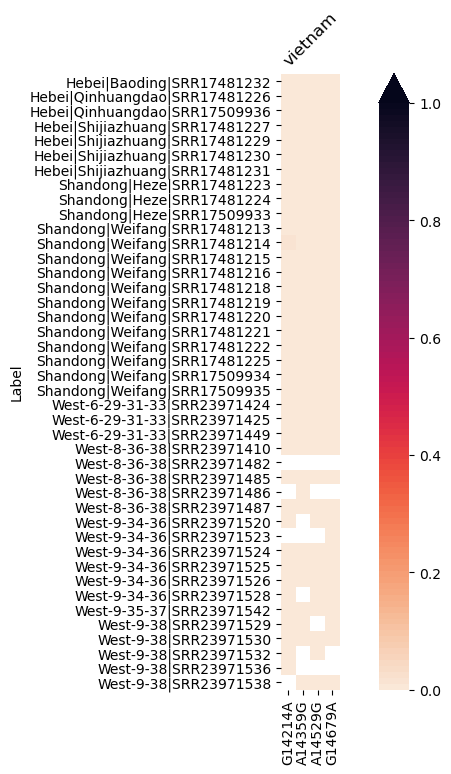

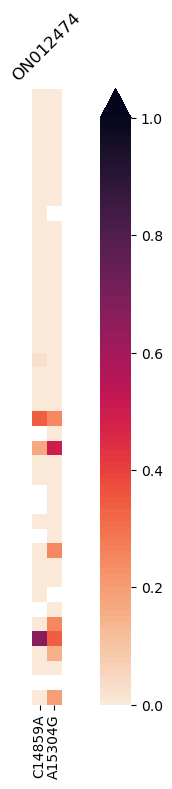

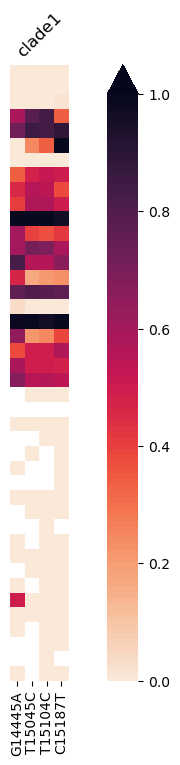

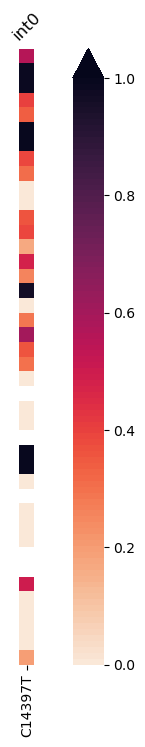

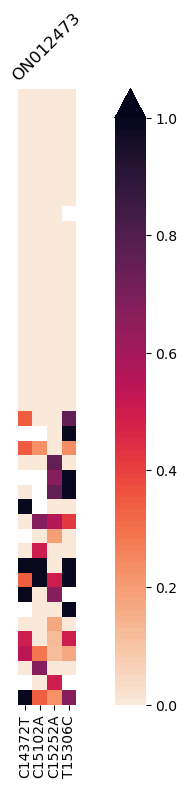

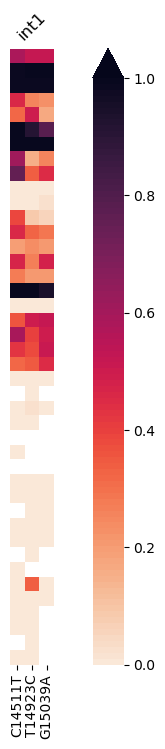

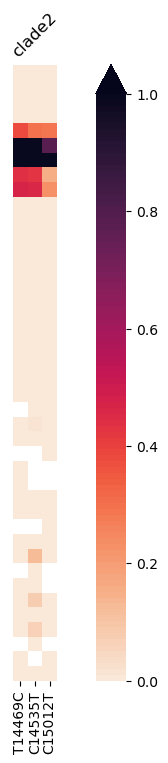

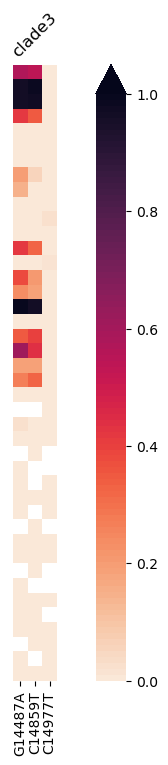

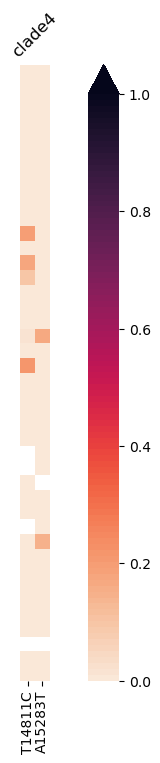

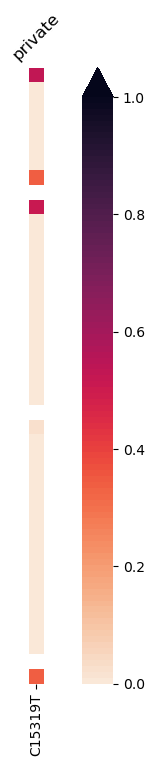

In [14]:
snps_full = {
    'vietnam': (['G14214A', 'A14359G', 'A14529G', 'G14679A']),
    'ON012474': ['C14859A', 'A15304G'],
    'clade1': (['G14445A', 'T15045C', 'T15104C', 'C15187T']),
    
    'int0': ['C14397T'],
    'ON012473': (['C14372T', 'C15102A', 'C15252A', 'T15306C']),
    
    'int1': ['C14511T','T14923C','G15039A'],
    'clade2': ['T14469C','C14535T','C15012T'],
    'clade3': ['G14487A', 'C14859T', 'C14977T'],
    # 'clade4': sorted(['A14553G', 'T14811C', 'T14924C', 'G15028A', 'C15051T', 'T15077C',  'A15283T']), # we pruned the branches with 5/7 these for simplicity
    'clade4': sorted(['T14811C', 'A15283T']),
    
    'private': sorted(['C15319T']) # C>T is the only mutation supported; none of the other nucleotides reach 10% frequency
}

snps = {
    'vietnam': sorted([14214, 14679, 14359, 14529]),
    'ON012474': [14859, 15304],
    'clade1': sorted([14445, 15045, 15104, 15187]),
    
    'int0': [14397],
    'ON012473': sorted([14372, 15102, 15252, 15306]),
    
    'int1': [14511, 14923, 15039],
    'clade2': [14469, 14535, 15012],
    'clade3': sorted([14859, 14487, 14977]),
    # 'clade4': sorted([14811, 15283, 15051, 14924, 14553, 15028, 15077]), # we pruned the branches with 5/7 these for simplicity
    'clade4': sorted([14811, 15283]),
    
    'private': sorted([15319]) # C>T is the only mutation supported; none of the other nucleotides reach 10% frequency
}


plt.rcParams['svg.fonttype'] = 'none'
colors = sns.color_palette('rocket_r', 8)
levels = [0, .05, .10, .25, .4, .6, .8, 1]
levels = np.linspace(0, 1, 100)
colors = sns.color_palette('rocket_r', len(levels))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")

df_all['snptype'] = None

for snptype in snps:
    snp_pos_mut_dict = {}
    for mut in snps_full[snptype]:
        snp_pos_mut_dict[int(mut[1:-1])] = mut

    test = df_all.loc[df_all['Position'].isin(snps[snptype])].copy()
    test['backbone_mut_perc'] = test.apply(lambda x: -1 if x['Depth'] == 0 else 0, axis=1)

    for mut in snps_full[snptype]:
        test.loc[test['Position'] == int(mut[1:-1]), 'backbone_mut_perc'] = test.loc[test['Position'] == int(mut[1:-1])].apply(lambda x: x[mut[-1]] / x['Depth'] if x['Depth'] > 0 else -1, axis=1)
    test = test.pivot(columns = 'Position', index='Label',values='backbone_mut_perc').fillna(-1)
    test = test.sort_index()

    plt.figure(figsize=(10,8))    
    sns.heatmap(test, square=True, vmin=0, vmax=1, cmap=cmap, yticklabels=True)

    # relabel xtick labels based on position linking to mutation
    locs, labels = plt.xticks()
    plt.xticks(locs, labels=[snp_pos_mut_dict[int(x)] for x in test.columns], rotation=90)

    # make xlabel vertical 
    plt.xticks(rotation=90)
    plt.xlabel(None)
    if snptype != 'vietnam':
        plt.ylabel(None)
        plt.yticks([])
    plt.title(snptype, rotation=45)

    plt.savefig('./Nyctereutes_procyonoides_snvs.' + snptype + "_heat.svg")
    plt.show()
